In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
train=pd.read_csv('/Users/piyushagarwal/Documents/Python Files/playground-series-s4e2/train.csv')
test=pd.read_csv('/Users/piyushagarwal/Documents/Python Files/playground-series-s4e2/test.csv')
sol=pd.read_csv('/Users/piyushagarwal/Documents/Python Files/playground-series-s4e2/solution.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18306 entries, 0 to 18305
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          17071 non-null  object 
 1   Age                             16495 non-null  float64
 2   Height                          16702 non-null  float64
 3   Weight                          16838 non-null  float64
 4   family_history_with_overweight  17241 non-null  object 
 5   FAVC                            17257 non-null  object 
 6   FCVC                            17331 non-null  float64
 7   NCP                             16586 non-null  float64
 8   CAEC                            16841 non-null  object 
 9   SMOKE                           16759 non-null  object 
 10  CH2O                            17373 non-null  float64
 11  SCC                             16503 non-null  object 
 12  FAF                             

In [4]:
train.drop_duplicates()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,33.226808,1.766888,83.337721,yes,NaN,2.0,NaN,Sometimes,no,1.964435,no,0.750111,0.000000,no,Automobile,Overweight_Level_II
1,Female,18.000000,1.600000,55.000000,yes,yes,2.0,3.000000,Sometimes,no,2.000000,no,1.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
2,NaN,26.000000,1.640741,111.930700,yes,yes,3.0,3.000000,Sometimes,no,2.617988,no,0.000000,NaN,Sometimes,Public_Transportation,Obesity_Type_III
3,Male,19.000000,1.690000,64.000000,no,yes,2.0,NaN,Frequently,no,2.000000,no,0.000000,1.000000,Sometimes,Automobile,Normal_Weight
4,Male,NaN,1.606474,94.189167,yes,yes,2.0,2.812283,Sometimes,no,2.000000,no,1.000000,0.000000,no,NaN,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16601,Female,37.218161,1.652202,80.993373,yes,yes,2.0,2.994800,Sometimes,NaN,1.028538,no,0.000000,0.797215,no,NaN,Overweight_Level_II
16602,Female,26.000000,NaN,111.600553,yes,NaN,3.0,3.000000,Sometimes,no,2.653425,NaN,0.000000,NaN,Sometimes,Public_Transportation,Obesity_Type_III
16603,Female,23.000000,1.650000,NaN,yes,yes,NaN,3.000000,Sometimes,no,2.000000,NaN,0.000000,2.000000,Frequently,Public_Transportation,Obesity_Type_I
16604,NaN,26.000000,1.654784,NaN,yes,yes,3.0,3.000000,Sometimes,no,2.675567,no,0.000000,0.237307,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
train.nunique()

Gender                               2
Age                               1572
Height                            1741
Weight                            1802
family_history_with_overweight       2
FAVC                                 2
FCVC                               870
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1411
SCC                                  2
FAF                               1264
TUE                               1233
CALC                                 3
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [6]:
train['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       3559
Obesity_Type_II        2846
Normal_Weight          2720
Obesity_Type_I         2601
Insufficient_Weight    2214
Overweight_Level_II    2195
Overweight_Level_I     2171
Name: count, dtype: int64

In [7]:
num_col=train.select_dtypes(include=['int64','float64'])
cat_col=train.select_dtypes(include=['object']).columns

In [8]:
num_col.columns.tolist()

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [9]:
num_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18306 entries, 0 to 18305
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     16495 non-null  float64
 1   Height  16702 non-null  float64
 2   Weight  16838 non-null  float64
 3   FCVC    17331 non-null  float64
 4   NCP     16586 non-null  float64
 5   CH2O    17373 non-null  float64
 6   FAF     16582 non-null  float64
 7   TUE     17186 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [10]:
cat_col.tolist()

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

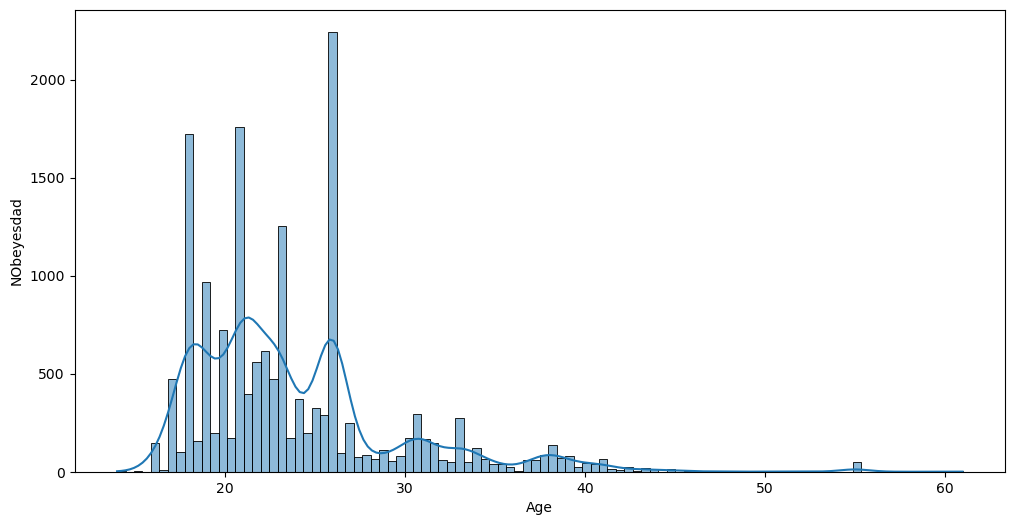

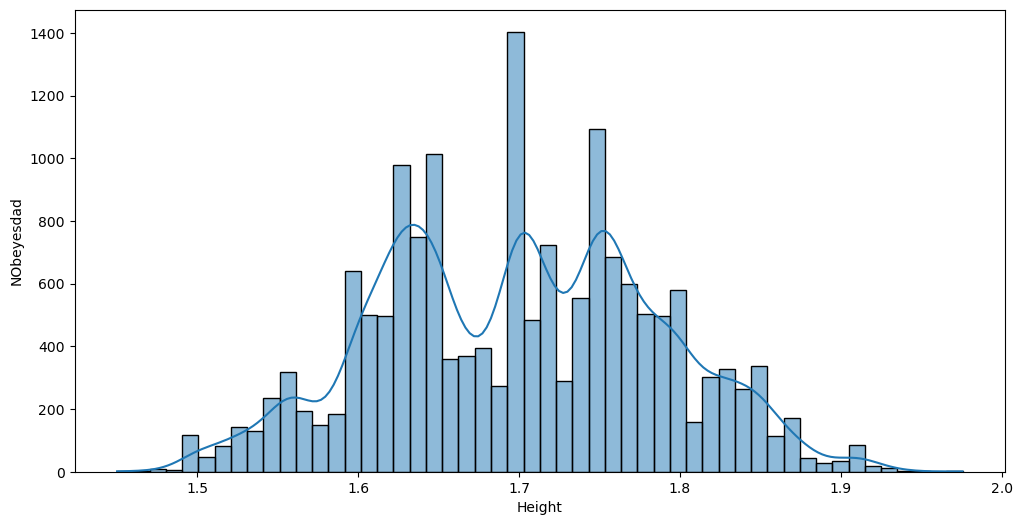

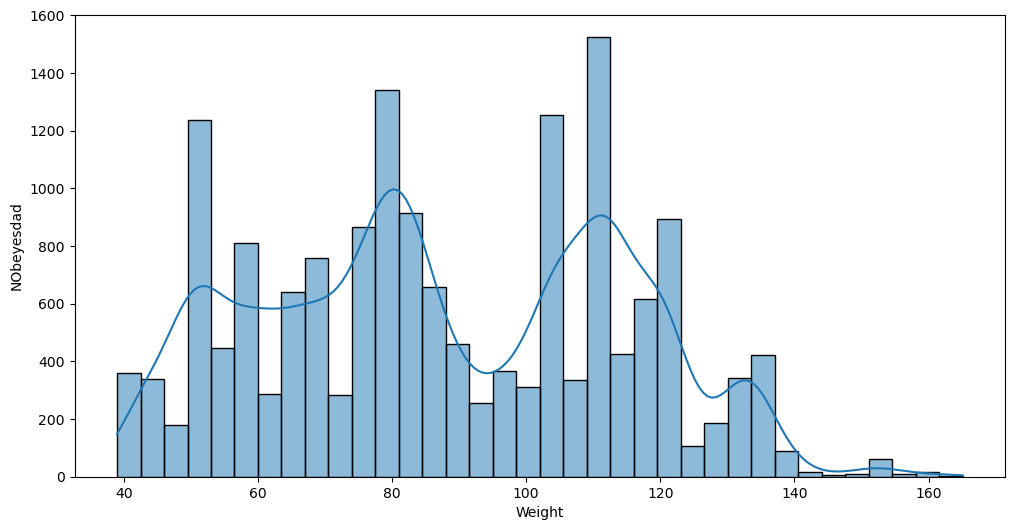

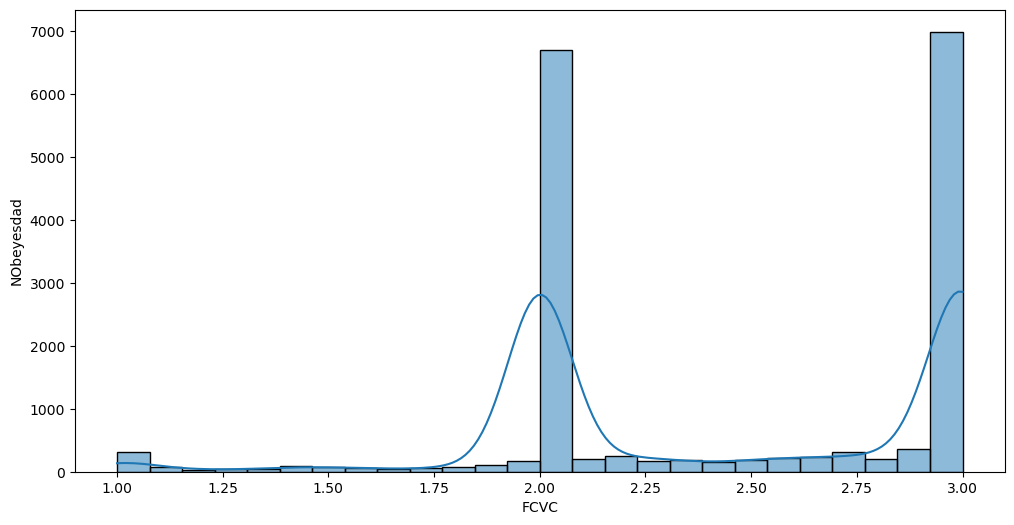

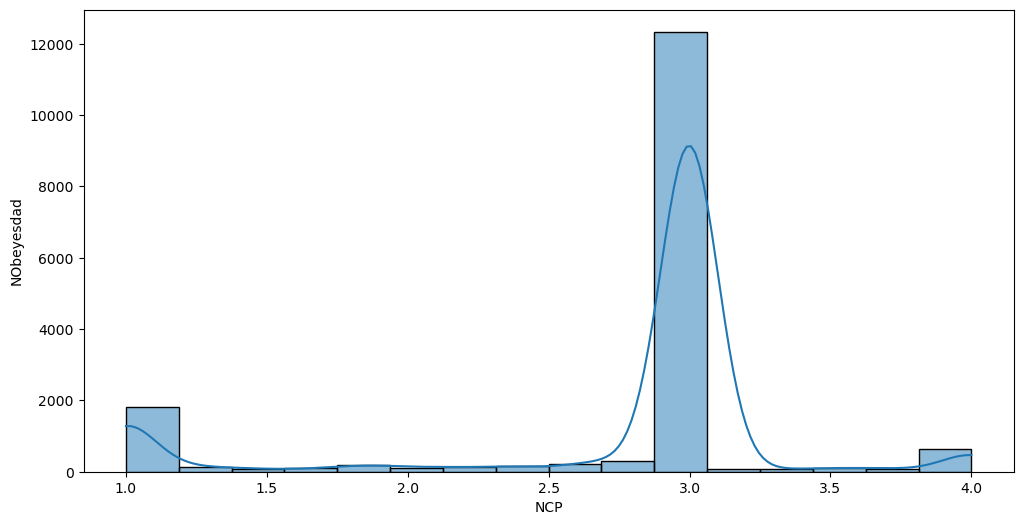

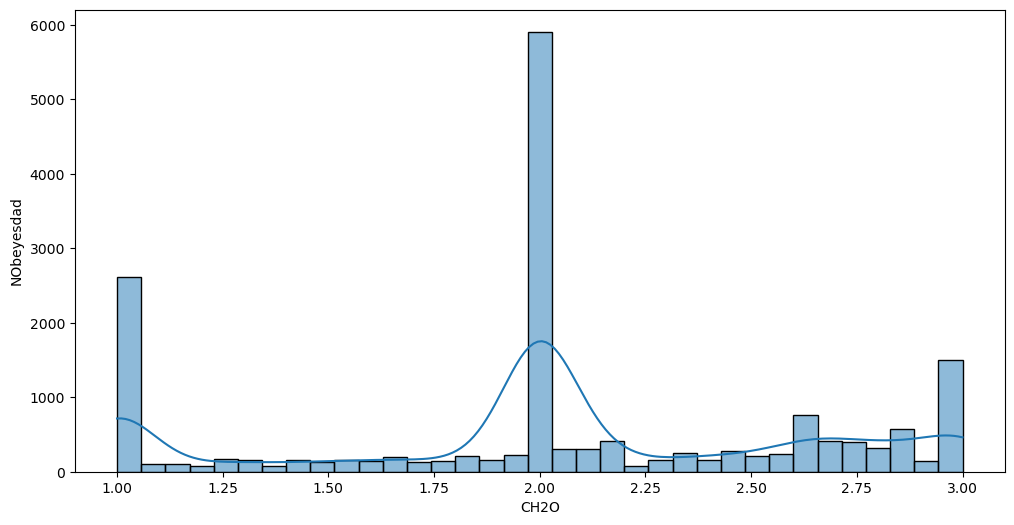

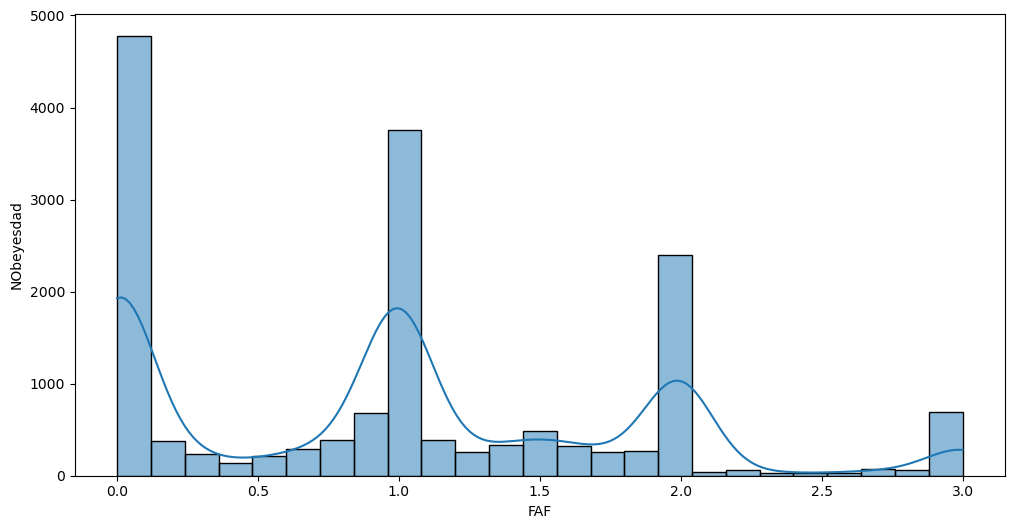

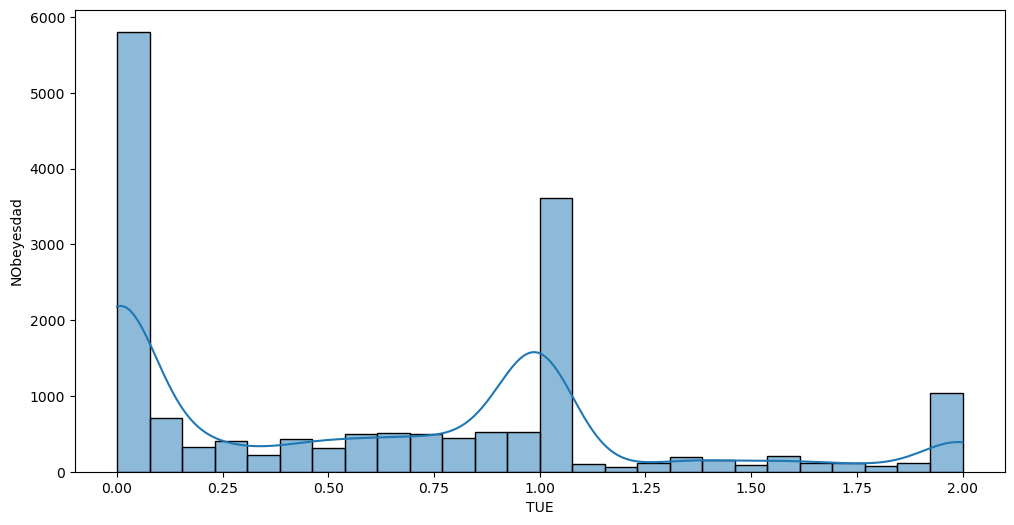

In [11]:
for col in num_col:
    plt.figure(figsize=(12,6))
    sns.histplot(x=col,data=train,kde=True)
    plt.xlabel(col)
    plt.ylabel('NObeyesdad')
    plt.show()

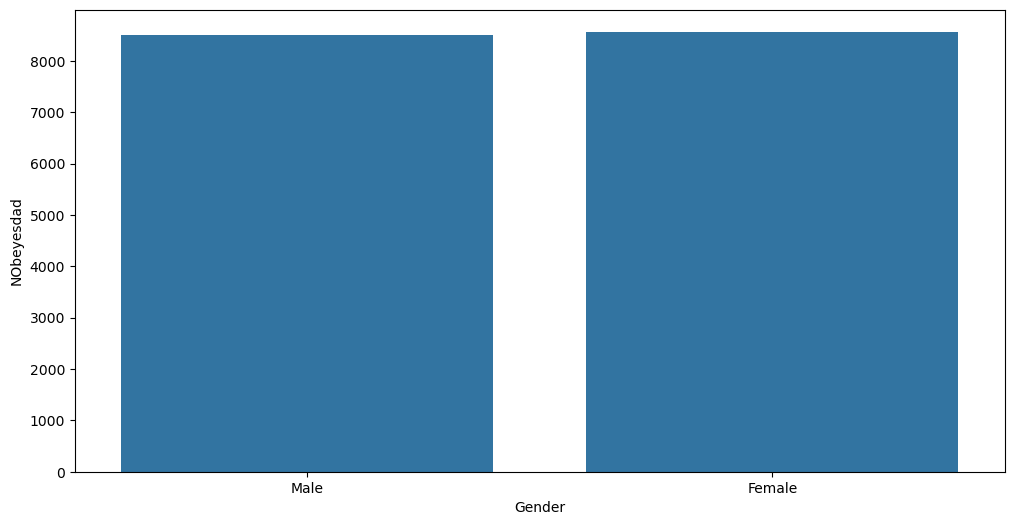

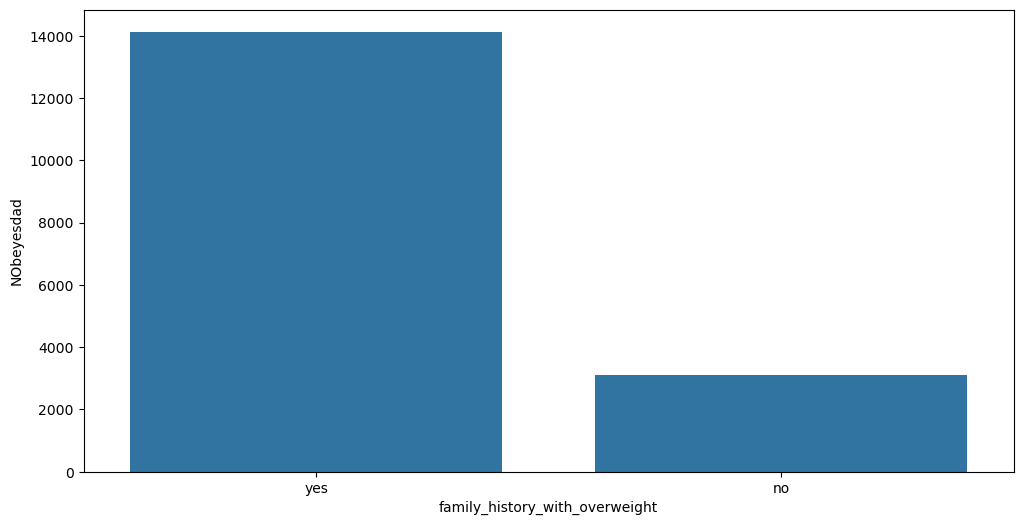

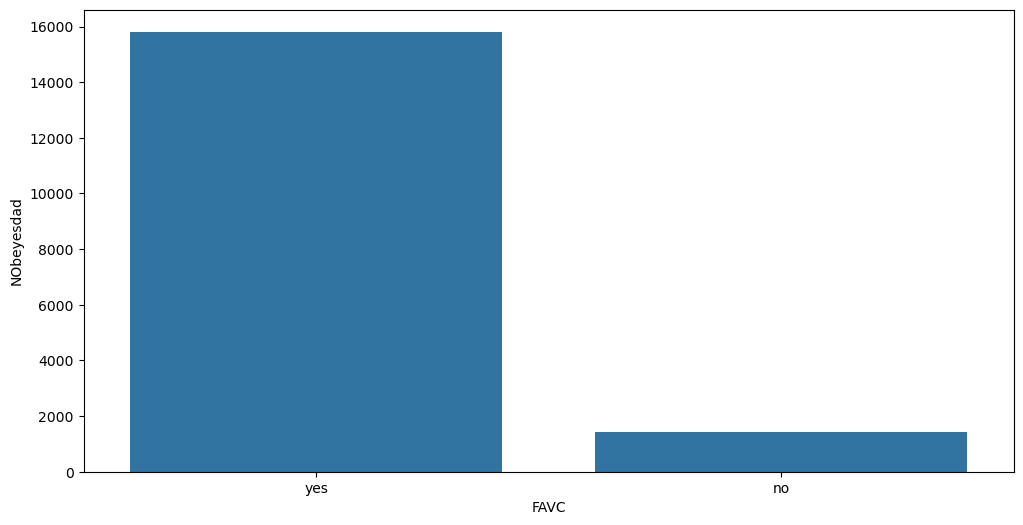

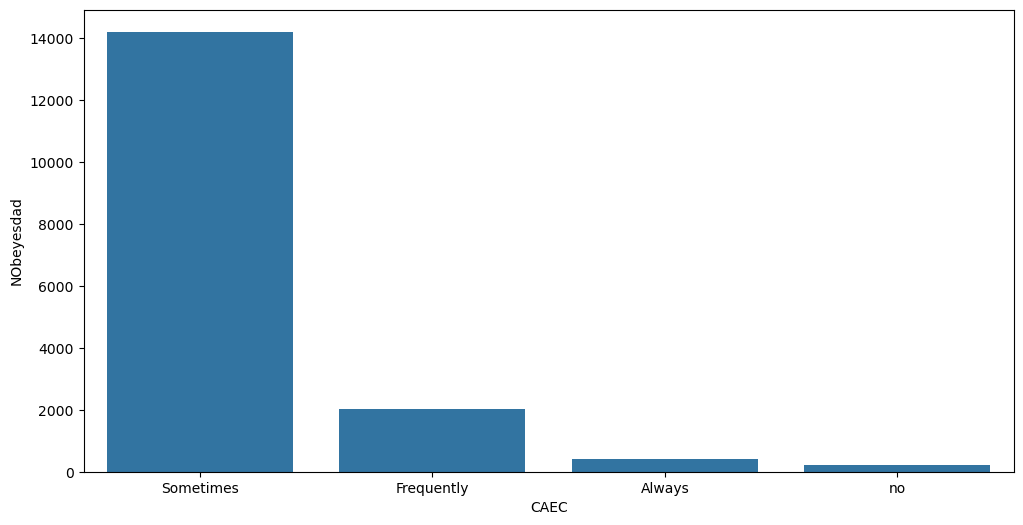

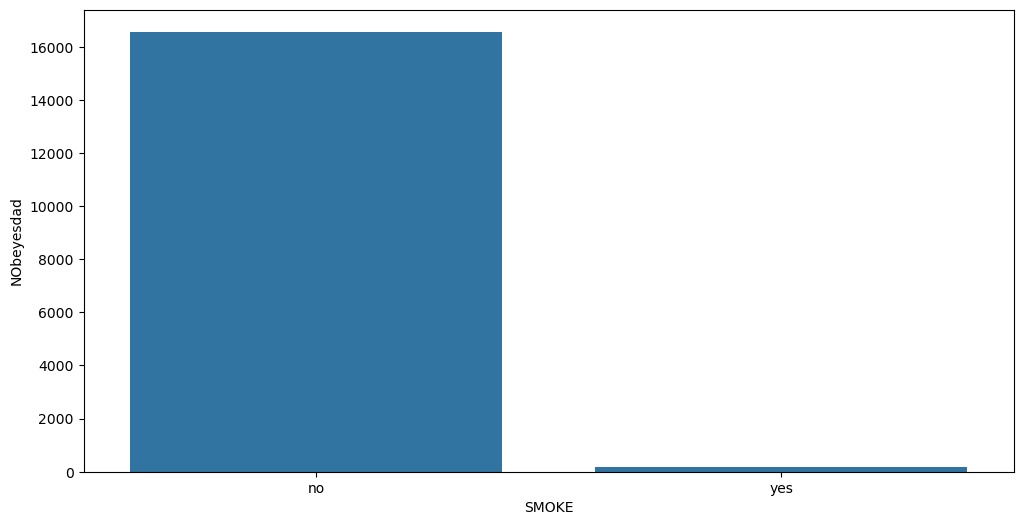

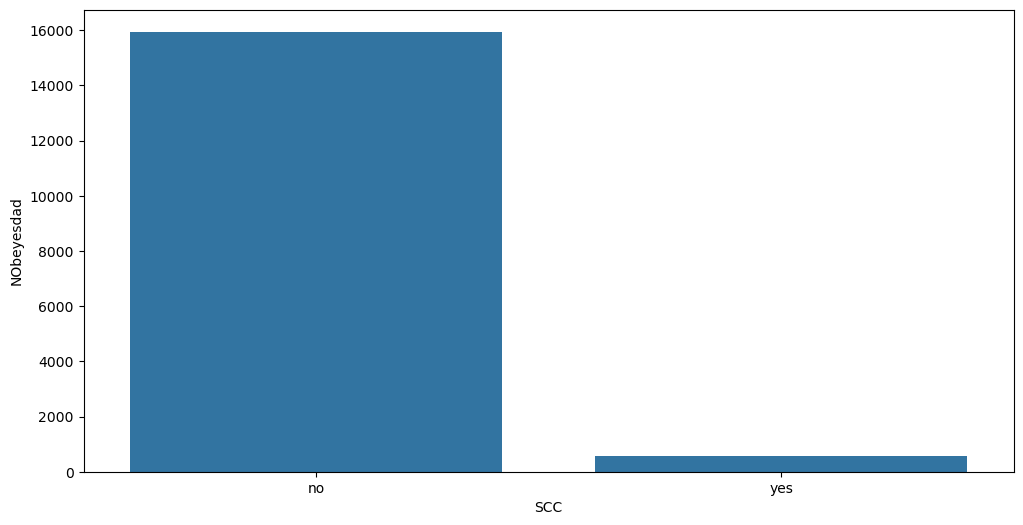

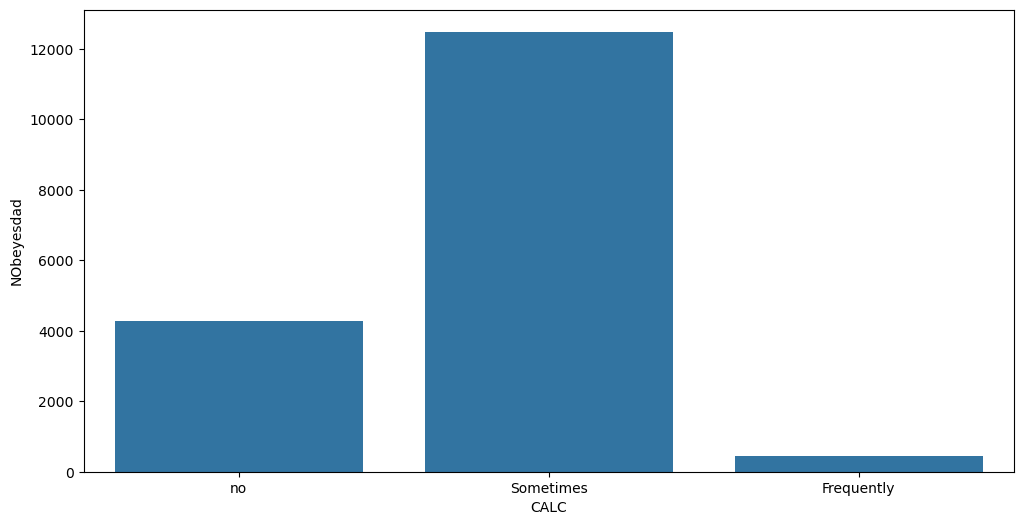

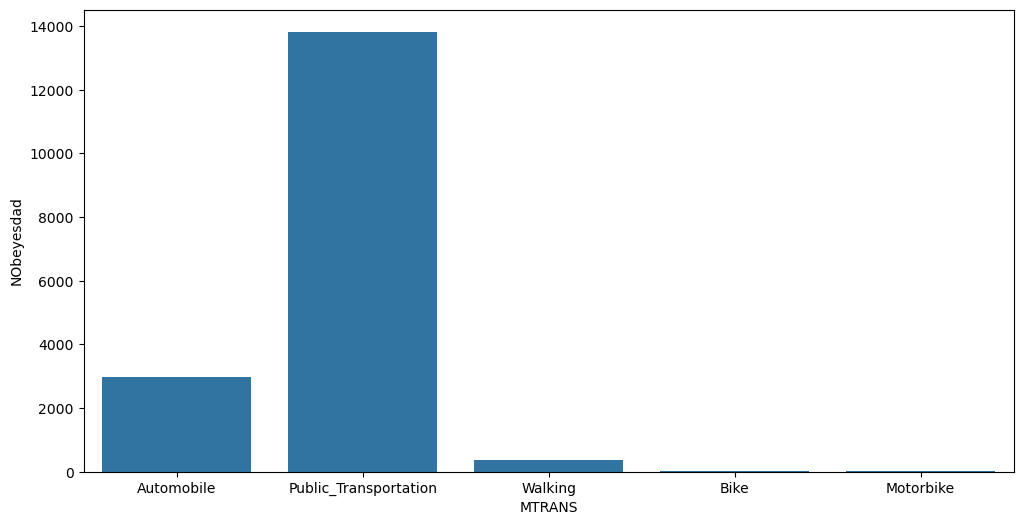

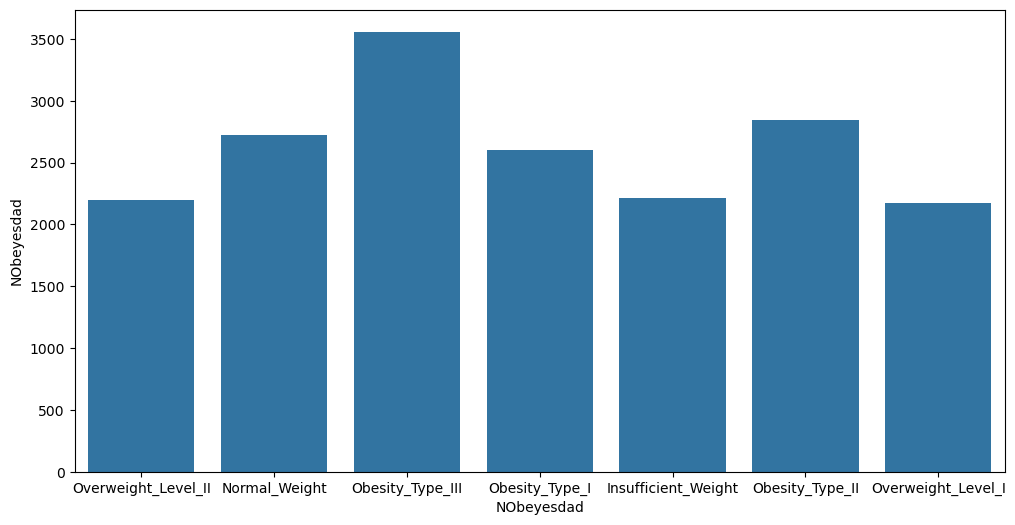

In [12]:
for col in cat_col:
    plt.figure(figsize=(12,6))
    sns.countplot(x=col,data=train)
    plt.xlabel(col)
    plt.ylabel('NObeyesdad')
    plt.show()

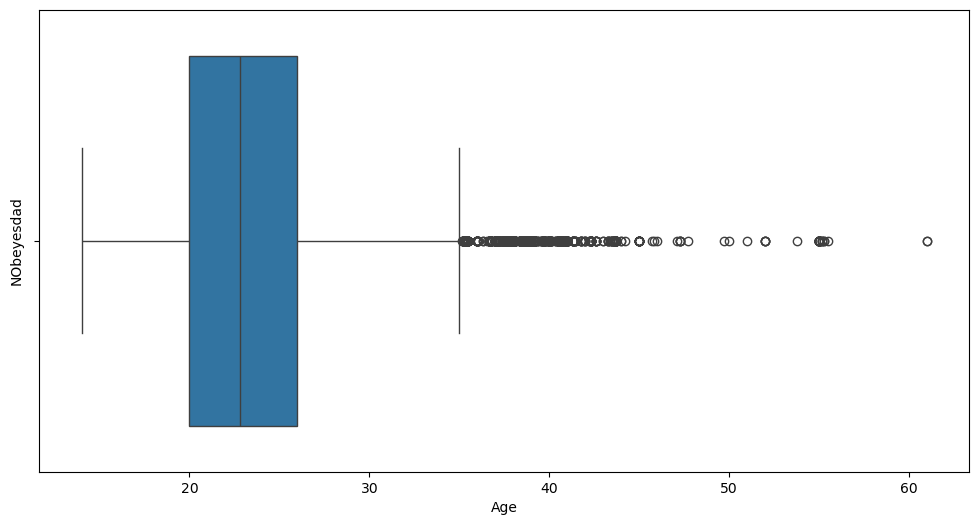

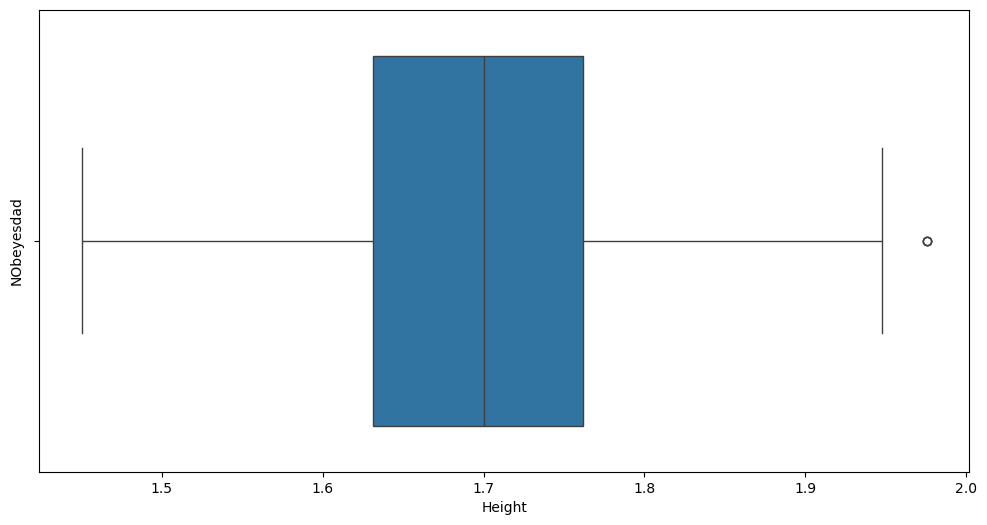

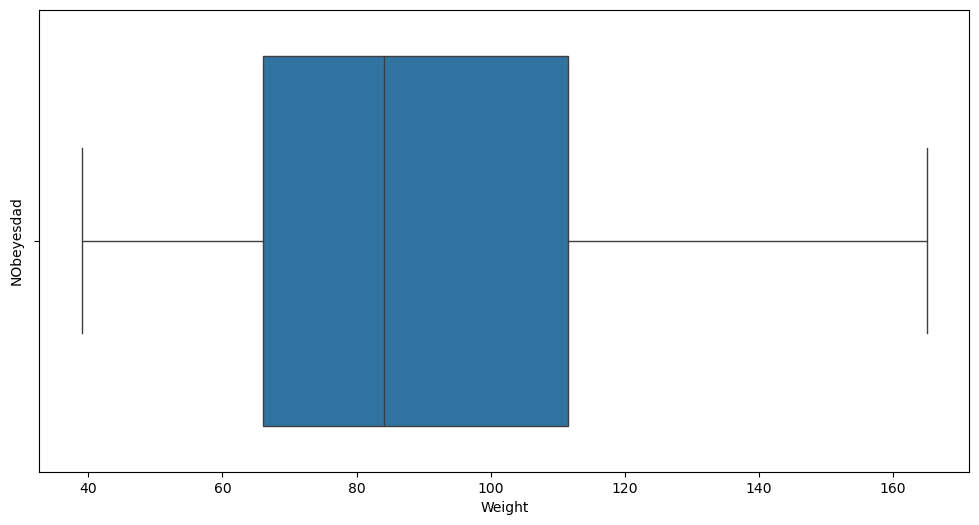

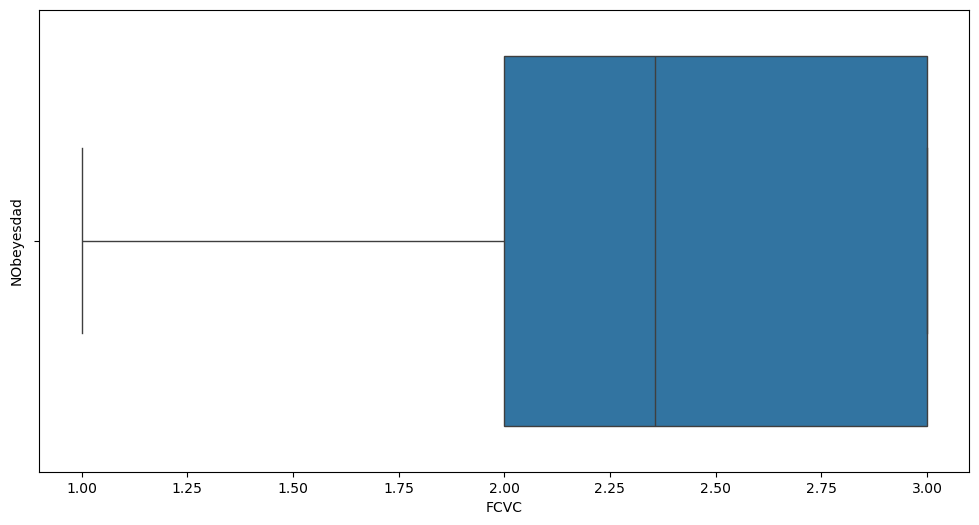

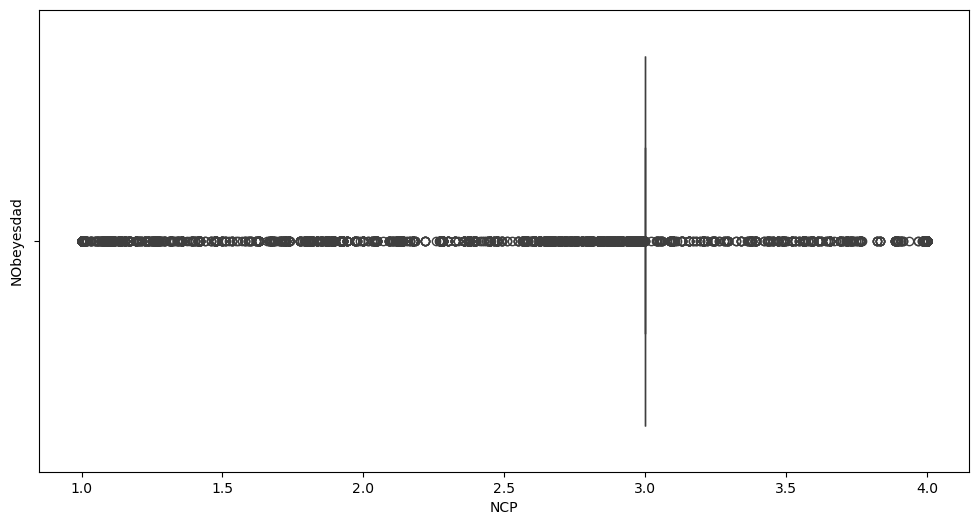

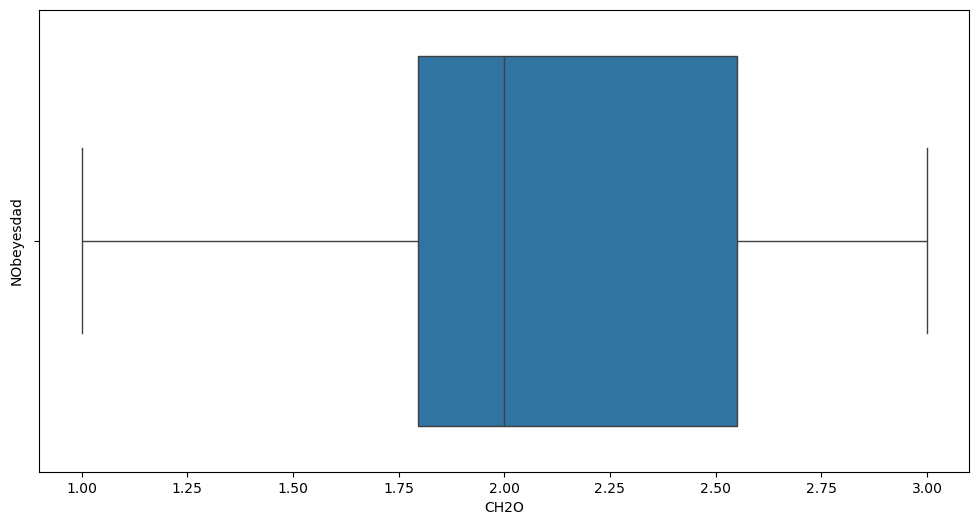

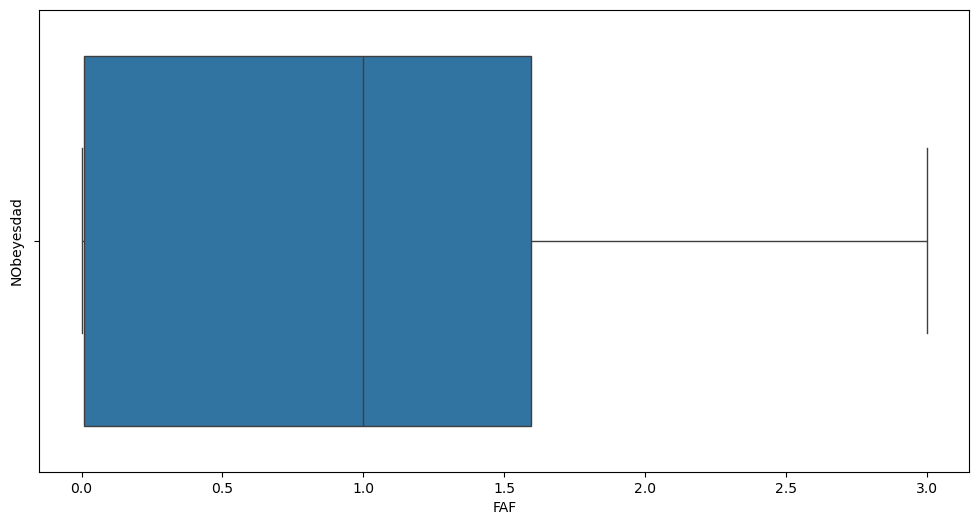

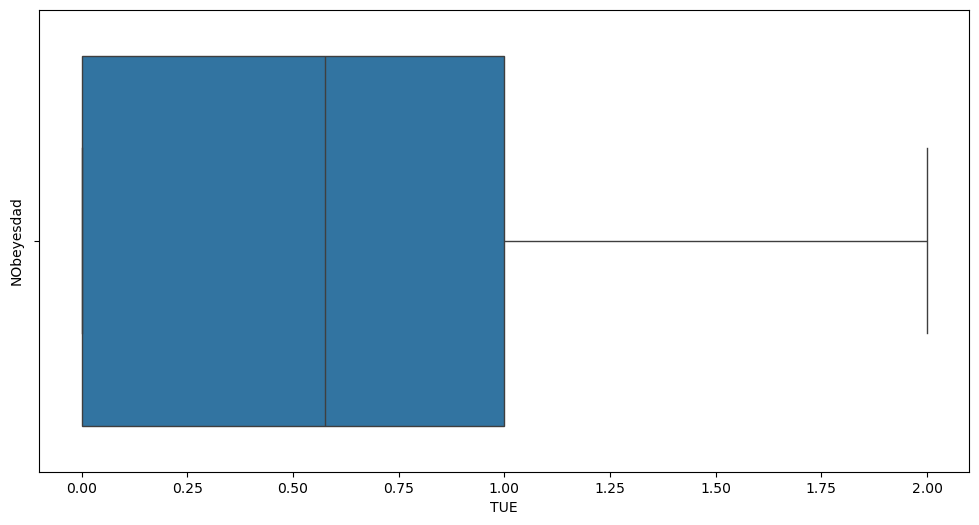

In [13]:
for col in num_col:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=col,data=train)
    plt.xlabel(col)
    plt.ylabel('NObeyesdad')
    plt.show()

In [ ]:
col = "Age"

Q1 = train[col].quantile(0.25)
Q3 = train[col].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_clean = train[(train[col] >= lower) & (train[col] <= upper)]

In [15]:
# for col in num_col:
#     plt.figure(figsize=(12,6))
#     sns.boxplot(x=col,data=df_clean)
#     plt.xlabel(col)
#     plt.ylabel('NObeyesdad')
#     plt.show()

In [16]:
# train=df_clean
# train.info()

In [17]:
train.drop(['NCP'],axis=1,inplace=True)

In [18]:
num_col=train.select_dtypes(include=['int64','float64']).columns
cat_col=train.select_dtypes(include=['object']).columns

In [19]:
for col in cat_col:
    print(train[col].value_counts())

Gender
Female    8571
Male      8500
Name: count, dtype: int64
family_history_with_overweight
yes    14132
no      3109
Name: count, dtype: int64
FAVC
yes    15813
no      1444
Name: count, dtype: int64
CAEC
Sometimes     14199
Frequently     2015
Always          395
no              232
Name: count, dtype: int64
SMOKE
no     16569
yes      190
Name: count, dtype: int64
SCC
no     15948
yes      555
Name: count, dtype: int64
CALC
Sometimes     12491
no             4288
Frequently      437
Name: count, dtype: int64
MTRANS
Public_Transportation    13823
Automobile                2963
Walking                    373
Bike                        29
Motorbike                   29
Name: count, dtype: int64
NObeyesdad
Obesity_Type_III       3559
Obesity_Type_II        2846
Normal_Weight          2720
Obesity_Type_I         2601
Insufficient_Weight    2214
Overweight_Level_II    2195
Overweight_Level_I     2171
Name: count, dtype: int64


In [20]:
# def cap_outliers_categorywise_all(df, cat_col, num_cols):

#     def cap_group(group):
#         group = group.copy()

#         # Work only on numeric columns
#         for col in num_cols:
#             Q1 = group[col].quantile(0.25)
#             Q3 = group[col].quantile(0.75)
#             IQR = Q3 - Q1

#             lower = Q1 - 1.5 * IQR
#             upper = Q3 + 1.5 * IQR

#             group[col] = group[col].clip(lower, upper)

#         return group

#     return (
#         df.groupby(cat_col, group_keys=False, observed=True, sort=False)
#           .apply(lambda g: cap_group(g))
#     )

In [21]:
# df_capped = cap_outliers_categorywise_all(train, 'NObeyesdad', num_col)

In [22]:
# target='NObeyesdad'
# for col in num_col:
#     plt.figure(figsize=(12,6))
#     sns.boxplot(x=target,y=col,data=df_capped)
#     plt.xlabel(target)
#     plt.ylabel(col)
#     plt.show()

In [23]:
# train=df_capped

In [24]:
for col in num_col:
    median_val = train[col].median()
    train.fillna({col: median_val}, inplace=True)
    print(f"Filled missing in {col} with median: {median_val}")

for col in cat_col:
    mode_val = train[col].mode()[0]
    train.fillna({col: mode_val}, inplace=True)
    print(f"Filled missing in {col} with mode: {mode_val}")

Filled missing in Age with median: 22.829681
Filled missing in Height with median: 1.7
Filled missing in Weight with median: 84.134712
Filled missing in FCVC with median: 2.357496
Filled missing in CH2O with median: 2.0
Filled missing in FAF with median: 1.0
Filled missing in TUE with median: 0.575969
Filled missing in Gender with mode: Female
Filled missing in family_history_with_overweight with mode: yes
Filled missing in FAVC with mode: yes
Filled missing in CAEC with mode: Sometimes
Filled missing in SMOKE with mode: no
Filled missing in SCC with mode: no
Filled missing in CALC with mode: Sometimes
Filled missing in MTRANS with mode: Public_Transportation
Filled missing in NObeyesdad with mode: Obesity_Type_III


In [25]:
from sklearn.preprocessing import RobustScaler
binary_cols = [
    'family_history_with_overweight',
    'FAVC',
    'SMOKE',
    'SCC'
]
multiclass_cols = ['CAEC', 'CALC', 'MTRANS']
target_col = 'NObeyesdad'

In [26]:
for col in binary_cols:
    train[col] = train[col].map({'no': 0, 'yes': 1})

In [27]:
train['Gender'] = train['Gender'].map({'Male': 1, 'Female': 0})

In [28]:
train = pd.get_dummies(train, columns=multiclass_cols, drop_first=True,dtype=int)

In [29]:
correct_order = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]
le = LabelEncoder()
le.classes_ = np.array(correct_order)
train[target_col] = le.transform(train[target_col])

In [30]:
train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,SMOKE,CH2O,SCC,...,NObeyesdad,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,33.226808,1.766888,83.337721,1,1,2.0,0,1.964435,0,...,3,0,1,0,0,1,0,0,0,0
1,0,18.000000,1.600000,55.000000,1,1,2.0,0,2.000000,0,...,1,0,1,0,1,0,0,0,1,0
2,0,26.000000,1.640741,111.930700,1,1,3.0,0,2.617988,0,...,6,0,1,0,1,0,0,0,1,0
3,1,19.000000,1.690000,64.000000,0,1,2.0,0,2.000000,0,...,1,1,0,0,1,0,0,0,0,0
4,1,22.829681,1.606474,94.189167,1,1,2.0,0,2.000000,0,...,4,0,1,0,0,1,0,0,1,0


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18306 entries, 0 to 18305
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          18306 non-null  int64  
 1   Age                             18306 non-null  float64
 2   Height                          18306 non-null  float64
 3   Weight                          18306 non-null  float64
 4   family_history_with_overweight  18306 non-null  int64  
 5   FAVC                            18306 non-null  int64  
 6   FCVC                            18306 non-null  float64
 7   SMOKE                           18306 non-null  int64  
 8   CH2O                            18306 non-null  float64
 9   SCC                             18306 non-null  int64  
 10  FAF                             18306 non-null  float64
 11  TUE                             18306 non-null  float64
 12  NObeyesdad                      

In [32]:
train[num_col].dtypes

Age       float64
Height    float64
Weight    float64
FCVC      float64
CH2O      float64
FAF       float64
TUE       float64
dtype: object

In [33]:
scaler = RobustScaler()
train[num_col] = scaler.fit_transform(train[num_col])

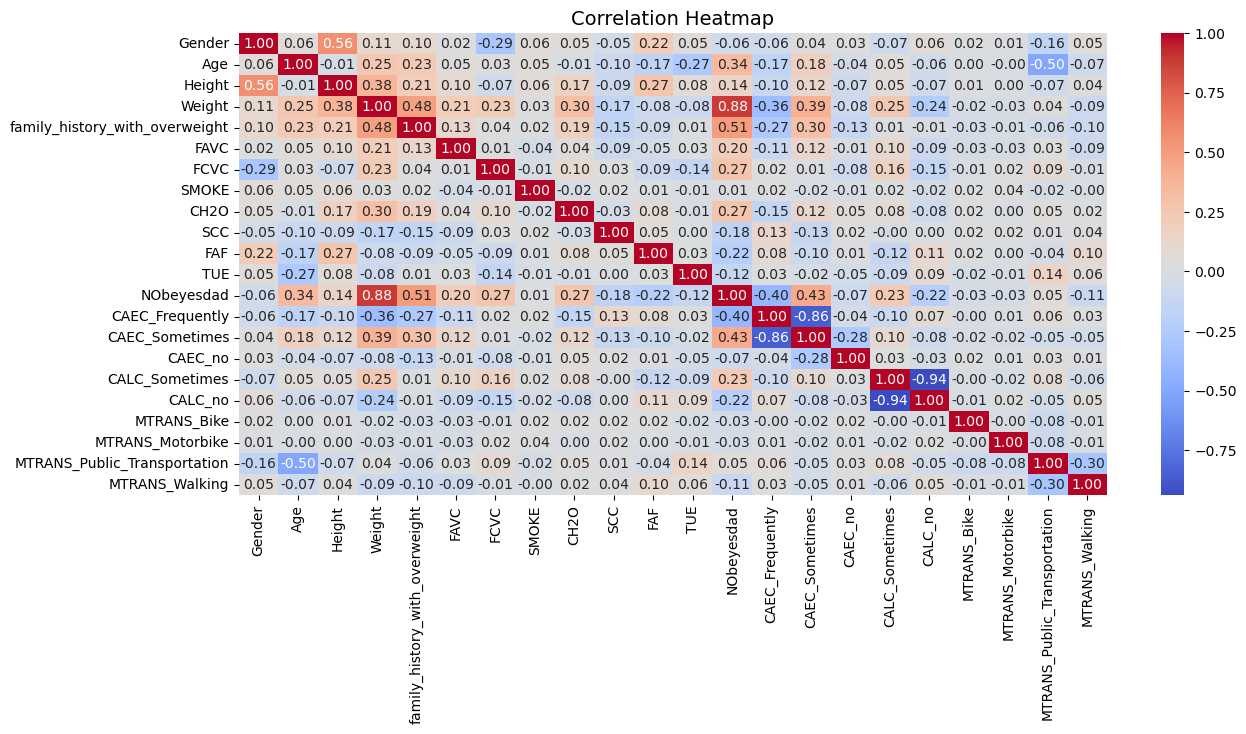

In [34]:
corr=train.corr(numeric_only=True)
plt.figure(figsize=(14,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [35]:
X = train.drop('NObeyesdad', axis=1)
y = train['NObeyesdad']

In [36]:
train['NObeyesdad'].value_counts()

NObeyesdad
6    3559
5    2846
1    2720
4    2601
0    2214
3    2195
2    2171
Name: count, dtype: int64

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
from sklearn.metrics import accuracy_score ,f1_score, confusion_matrix

In [39]:
# import optuna
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score, StratifiedKFold

# def objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#         'max_depth': trial.suggest_int('max_depth', 3, 30),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
#         'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
#         'oob_score': trial.suggest_categorical('oob_score', [True, False]),
#         'n_jobs': -1
#     }

#     model = RandomForestClassifier(**params)

#     cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#     scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    
#     return scores.mean()

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)  # increase n_trials for better search

# print("Best Accuracy: {:.4f}".format(study.best_value))
# print("Best Parameters: ", study.best_params) 

In [40]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier()

# param_grid = {
#      'n_estimators': [100, 200, 500],           
#      'max_depth': [None, 10, 20, 30],           
#      'min_samples_split': [2, 5, 10],           
#      'min_samples_leaf': [1, 2, 4],             
#      'max_features': ['sqrt', 'log2', None],
#      'oob_score':[True],
#      'class_weight':['balanced']
# }

# grid = GridSearchCV(
#       estimator=model,
#       param_grid=param_grid,
#       scoring='accuracy',    
#       cv=3,                  
#       verbose=2,
#       n_jobs=-1
# )              


# grid.fit(X_train, y_train)
# print("Best Parameters:", grid.best_params_)
# print("Best Cross-Validation Score:", grid.best_score_)
# best_model = grid.best_estimator_
# y_pred = best_model.predict(X_val)

# The best parameters from above grid search are:
# {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

In [41]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=426, max_depth=22, min_samples_split=6, min_samples_leaf=1, max_features=None, oob_score=False)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.4f}")   
train_f1score = f1_score(y_train, y_pred_train,average='weighted')
print(f"Training F1 Score: {train_f1score:.4f}")
train_conf_matrix = confusion_matrix(y_train, y_pred_train)
print("Training Confusion Matrix:")
print(train_conf_matrix)
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1score = f1_score(y_val, y_pred,average='weighted')
conf_matrix = confusion_matrix(y_val, y_pred)
print(f"Val Accuracy: {accuracy:.4f}")
print(f"VAl F1 Score: {f1score:.4f}")
print("Val Confusion Matrix:")
print(conf_matrix)

Training Accuracy: 0.9778
Training F1 Score: 0.9778
Training Confusion Matrix:
[[1744   24    2    1    0    0    0]
 [  37 2110   20    7    1    1    0]
 [   9   31 1656   32    7    1    1]
 [   1    8   26 1698   21    2    0]
 [   2    3   18   21 2017   17    3]
 [   0    0    0    5   13 2256    2]
 [   1    0    1    0    3    4 2838]]
Val Accuracy: 0.8768
VAl F1 Score: 0.8767
Val Confusion Matrix:
[[398  36   2   2   2   3   0]
 [ 28 466  27  14   9   0   0]
 [  2  47 311  60  12   2   0]
 [  0  11  35 348  36   9   0]
 [  3   3  11  46 435  21   1]
 [  0   0   1   6  13 549   1]
 [  0   0   0   0   1   7 704]]


In [42]:
rf=RandomForestClassifier(n_estimators=426, max_depth=22, min_samples_split=6, min_samples_leaf=1, max_features=None, oob_score=False)
rf.fit(X, y)

,n_estimators,426
,criterion,'gini'
,max_depth,22
,min_samples_split,6
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4152 entries, 0 to 4151
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4152 non-null   int64  
 1   Gender                          4152 non-null   object 
 2   Age                             4152 non-null   float64
 3   Height                          4152 non-null   float64
 4   Weight                          4152 non-null   float64
 5   family_history_with_overweight  4152 non-null   object 
 6   FAVC                            4152 non-null   object 
 7   FCVC                            4152 non-null   float64
 8   NCP                             4152 non-null   float64
 9   CAEC                            4152 non-null   object 
 10  SMOKE                           4152 non-null   object 
 11  CH2O                            4152 non-null   float64
 12  SCC                             41

In [44]:
test.drop_duplicates()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,Female,26.000000,1.649178,111.933010,yes,yes,3.000000,3.000000,Sometimes,no,1.292479,no,0.065264,0.711331,Sometimes,Public_Transportation
1,2,Male,18.000000,1.750000,80.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,1.000000,1.000000,Sometimes,Public_Transportation
2,3,Female,23.360307,1.713380,84.722222,yes,yes,2.880161,3.000000,Sometimes,no,2.847264,no,2.000000,0.002600,no,Public_Transportation
3,4,Male,30.002029,1.670667,112.000381,yes,yes,1.572036,3.000000,Sometimes,no,2.003563,no,0.000000,0.114457,Sometimes,Public_Transportation
4,5,Male,17.000000,1.610000,50.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,2.000000,no,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,4148,Female,16.000000,1.560000,51.000000,no,yes,2.000000,3.000000,Always,no,2.000000,no,1.000000,1.000000,Sometimes,Public_Transportation
4148,4149,Male,18.000000,1.780000,108.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
4149,4150,Female,22.693989,1.627908,82.000000,yes,yes,1.918251,1.000000,Sometimes,no,1.998108,no,0.000000,1.382906,Sometimes,Public_Transportation
4150,4151,Male,33.185661,1.826970,87.000000,yes,yes,2.000000,1.000000,Sometimes,no,2.175632,no,2.000000,0.000000,Sometimes,Automobile


In [45]:
test.drop(columns=['id'],inplace=True)

In [46]:
# test["Age"] = test["Age"].clip(upper=35)

In [47]:
test.drop(['NCP'],axis=1,inplace=True)

In [48]:
num_col_test=test.select_dtypes(include=['int64','float64']).columns
cat_col_test=test.select_dtypes(include=['object']).columns

In [49]:
binary_cols = [
    'family_history_with_overweight',
    'FAVC',
    'SMOKE',
    'SCC'
]
multiclass_cols = ['CAEC', 'CALC', 'MTRANS']

In [50]:
for col in binary_cols:
    test[col] = test[col].map({'no': 0, 'yes': 1})

In [51]:
test['Gender'] = test['Gender'].map({'Male': 1, 'Female': 0})

In [52]:
test = pd.get_dummies(test, columns=multiclass_cols, drop_first=True,dtype=int)

In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4152 entries, 0 to 4151
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          4152 non-null   int64  
 1   Age                             4152 non-null   float64
 2   Height                          4152 non-null   float64
 3   Weight                          4152 non-null   float64
 4   family_history_with_overweight  4152 non-null   int64  
 5   FAVC                            4152 non-null   int64  
 6   FCVC                            4152 non-null   float64
 7   SMOKE                           4152 non-null   int64  
 8   CH2O                            4152 non-null   float64
 9   SCC                             4152 non-null   int64  
 10  FAF                             4152 non-null   float64
 11  TUE                             4152 non-null   float64
 12  CAEC_Frequently                 41

In [54]:
test[num_col_test] = scaler.transform(test[num_col_test])
test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,SMOKE,CH2O,SCC,...,TUE,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,0.560638,-0.431719,0.673031,1,1,0.642504,0,-1.131127,0,...,0.135362,0,1,0,1,0,0,0,1,0
1,1,-0.854079,0.424737,-0.100106,0,1,-0.357496,0,0.000000,0,...,0.424031,0,1,0,1,0,0,0,1,0
2,0,0.093836,0.113660,0.014224,1,1,0.522665,0,1.354537,0,...,-0.573369,0,1,0,0,1,0,0,1,0
3,1,1.268356,-0.249176,0.674662,1,1,-0.785460,0,0.005696,0,...,-0.461512,0,1,0,1,0,0,0,1,0
4,1,-1.030919,-0.764526,-0.826443,0,1,-0.357496,0,0.000000,0,...,1.424031,0,1,0,0,1,0,0,1,0


In [55]:
test_predictions = rf.predict(test)

In [56]:
sol.drop(['id','Usage'], axis=1, inplace=True)

In [57]:
sol['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       804
Obesity_Type_II        657
Normal_Weight          626
Obesity_Type_I         543
Insufficient_Weight    524
Overweight_Level_II    514
Overweight_Level_I     484
Name: count, dtype: int64

In [58]:
sol['NObeyesdad']=le.transform(sol['NObeyesdad'])
sol.head()

,NObeyesdad
0,6
1,2
2,4
3,5
4,0


In [59]:
accuracy=accuracy_score(sol['NObeyesdad'], test_predictions)
print(f"Test Set Accuracy: {accuracy:.4f}")
f1score_test = f1_score(sol['NObeyesdad'], test_predictions, average='weighted')
print(f"Test Set F1 Score: {f1score_test:.4f}")
test_conf_matrix = confusion_matrix(sol['NObeyesdad'], test_predictions)
print("Test Set Confusion Matrix:")
print(test_conf_matrix)

Test Set Accuracy: 0.8878
Test Set F1 Score: 0.8881
Test Set Confusion Matrix:
[[485  36   1   2   0   0   0]
 [ 29 538  53   6   0   0   0]
 [  1  44 362  66  11   0   0]
 [  0   9  55 404  40   6   0]
 [  2   2  16  54 457  11   1]
 [  0   0   0   3  13 641   0]
 [  0   0   0   0   2   3 799]]


In [60]:
test_predictions

array([6, 2, 4, ..., 4, 2, 3])

In [61]:
test_predictions_labels = le.inverse_transform(test_predictions)
test_predictions_labels

array(['Obesity_Type_III', 'Overweight_Level_I', 'Obesity_Type_I', ...,
       'Obesity_Type_I', 'Overweight_Level_I', 'Overweight_Level_II'],
      dtype='<U19')

In [63]:
sandbox=pd.DataFrame(test_predictions_labels, columns=['NObeyesdad'])

In [67]:
sandbox.head()

,NObeyesdad
0,Obesity_Type_III
1,Overweight_Level_I
2,Obesity_Type_I
3,Obesity_Type_II
4,Insufficient_Weight


In [68]:
sandbox.to_csv('sandbox.csv', index=False)